In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     

In [3]:
df = pd.read_csv("seismic-bumps.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seismic         2584 non-null   object
 1   seismoacoustic  2584 non-null   object
 2   shift           2584 non-null   object
 3   genergy         2584 non-null   int64 
 4   gpuls           2584 non-null   int64 
 5   gdenergy        2584 non-null   int64 
 6   gdpuls          2584 non-null   int64 
 7   hazard          2584 non-null   object
 8   nbumps          2584 non-null   int64 
 9   nbumps2         2584 non-null   int64 
 10  nbumps3         2584 non-null   int64 
 11  nbumps4         2584 non-null   int64 
 12  nbumps5         2584 non-null   int64 
 13  nbumps6         2584 non-null   int64 
 14  nbumps7         2584 non-null   int64 
 15  nbumps89        2584 non-null   int64 
 16  energy          2584 non-null   int64 
 17  maxenergy       2584 non-null   int64 
 18  class   

In [5]:
df.head(10)
#vedere la correlaione tra sismico sismoacustico e azzardo

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
5,a,a,W,63760,195,-73,-65,a,0,0,0,0,0,0,0,0,0,0,0
6,a,a,W,207930,614,-6,18,a,2,2,0,0,0,0,0,0,1000,700,0
7,a,a,N,48990,194,-27,-3,a,1,0,1,0,0,0,0,0,4000,4000,0
8,a,a,N,100190,303,54,52,a,0,0,0,0,0,0,0,0,0,0,0
9,a,a,W,247620,675,4,25,a,1,1,0,0,0,0,0,0,500,500,0


In [6]:
X=df.values

In [7]:
X_list= df.values.tolist()
X


array([['a', 'a', 'N', ..., 0, 0, 0],
       ['a', 'a', 'N', ..., 2000, 2000, 0],
       ['a', 'a', 'N', ..., 0, 0, 0],
       ...,
       ['b', 'a', 'W', ..., 0, 0, 0],
       ['a', 'a', 'W', ..., 0, 0, 0],
       ['a', 'a', 'W', ..., 0, 0, 0]], dtype=object)

In [8]:
df.isna().any()

seismic           False
seismoacoustic    False
shift             False
genergy           False
gpuls             False
gdenergy          False
gdpuls            False
hazard            False
nbumps            False
nbumps2           False
nbumps3           False
nbumps4           False
nbumps5           False
nbumps6           False
nbumps7           False
nbumps89          False
energy            False
maxenergy         False
class             False
dtype: bool

In [9]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [10]:
cols = [col for col in df.columns if col !="seismic" "seismoacustic" "shift" "hazard"]

In [11]:
df.groupby(["genergy"]).mean()

,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
genergy,,,,,,,,,,,,,,
100,4.0,-96.0,-90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,3.0,-67.0,-92.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0.0
340,6.0,-87.0,-85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
430,3.0,-71.0,-92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,7.0,-83.0,-82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102300,4014.0,27.0,26.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4000.0,3000.0,0.0
2129020,3722.0,161.0,91.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,20600.0,20000.0,0.0
2160800,4518.0,35.0,57.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,5100.0,2000.0,0.0


In [12]:
df.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


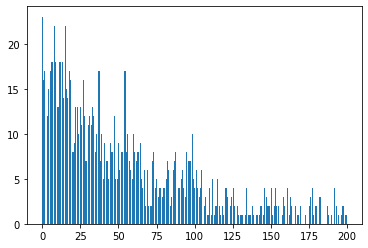

In [13]:
plt.hist(df["gdenergy"], bins=np.arange(0,200,0.71))
plt.show()

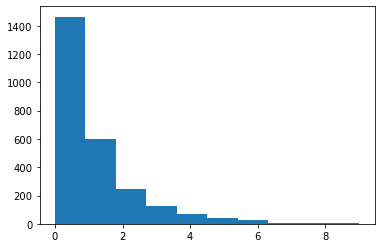

In [14]:
plt.hist(df["nbumps"])
plt.show()

Text(0.5, 0, 'Number Bumps per type')

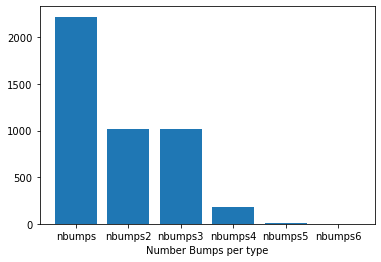

In [15]:
plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[(df["nbumps"]).sum(),(df["nbumps2"]).sum(),(df["nbumps3"]).sum(),(df["nbumps4"]).sum(),(df["nbumps5"]).sum(),(df["nbumps6"]).sum()])
plt.xlabel("Number Bumps per type")

Text(0.5, 0, 'Number Bumps per type')

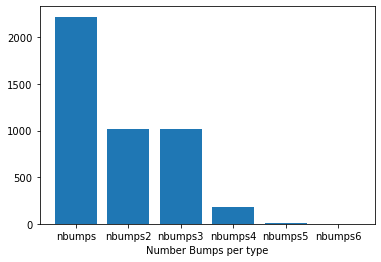

In [16]:
plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[(df["nbumps"]).sum(),(df["nbumps2"]).sum(),(df["nbumps3"]).sum(),(df["nbumps4"]).sum(),(df["nbumps5"]).sum(),(df["nbumps6"]).sum()])
plt.xlabel("Number Bumps per type")

In [17]:
X=df.values
n = np.zeros(shape=6)   #n verrà usato come contatore del numero dei bumps nel caso la classe fosse 0
m = np.zeros(shape=6)
x = np.zeros(shape=6) 
z = np.zeros(shape=6) 

C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
C:\Users\marco\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Number Bumps per type')

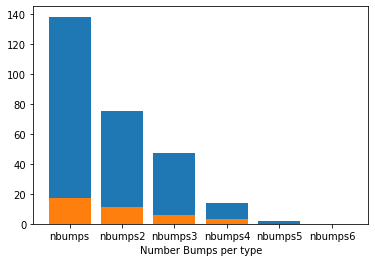

In [18]:
X=df.values
n = np.zeros(shape=6)   #n verrà usato come contatore del numero dei bumps nel caso la classe fosse 0
m = np.zeros(shape=6)
x = np.zeros(shape=6) 
z = np.zeros(shape=6) 

for a in range(0,5):           
    for b in range(0,2584):    
        if X[b,7]=="a":         
            n[a]=n[a]+X[b,8+a]     

for a in range(0,5):           
    for b in range(0,2584):    
        if X[b,7]=="b":         
            m[a]=m[a]+X[b,8+a] 
for a in range(0,5):           
    for b in range(0,2584):    
        if X[b,7]=="c":         
            x[a]=x[a]+X[b,8+a] 

for a in range(0,5):           
    for b in range(0,2584):    
        if X[b,7]=="d":         
            z[a]=z[a]+X[b,8+a] 
#plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[n[0],n[1],n[2],n[3],n[4],n[5]])            
plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[m[0],m[1],m[2],m[3],m[4],m[5]])
plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[x[0],x[1],x[2],[3],x[4],x[5]])
plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[z[0],z[1],z[2],z[3],z[4],z[5]])
plt.xlabel("Number Bumps per type")

In [19]:
n,m,x,z

(array([2066.,  931.,  962.,  161.,   10.,    0.]),
 array([138.,  75.,  47.,  14.,   2.,   0.]),
 array([17., 11.,  6.,  0.,  0.,  0.]),
 array([0., 0., 0., 0., 0., 0.]))

In [20]:
#quindi non ci sono mai stati bumps di liv 4 se l'azzardo è c. Quindi non possiamo correrarli all'azzardo alto

In [21]:
#numero di volte in cui il liv di azzardo a è capitato sugli 2584 intervalli
X=df.values
q=0
for a in range(0,2584):
    if X[a,7]=="a":
        q=q+1
q

2342

In [22]:
X=df.values
w=0
for a in range(0,2584):
    if X[a,7]=="b":
        w=w+1
w 

212

In [23]:
X=df.values
e=0
for a in range(0,2584):
    if X[a,7]=="c":
        e=e+1
e

30

In [24]:
U=df[df["hazard"]=="a"]
U

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578,b,a,W,28910,307,115,20,a,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#voglio rapportare i numeri di n,m,x,z al numero di volte che sono accaduti, per avere quindi una media (divisa per classe di azzardo)


In [26]:
Y= range(0,5)
Y

range(0, 5)

In [27]:
n,m,x,z

(array([2066.,  931.,  962.,  161.,   10.,    0.]),
 array([138.,  75.,  47.,  14.,   2.,   0.]),
 array([17., 11.,  6.,  0.,  0.,  0.]),
 array([0., 0., 0., 0., 0., 0.]))

In [28]:
df[df["hazard"]=="d"]
df[df["seismic"]=="d"]
df[df["seismoacoustic"]=="d"]

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class


In [29]:
#non ci sono azzardi, sismici e sismoacustici di classe d

Text(0.5, 0, 'Number Bumps per type')

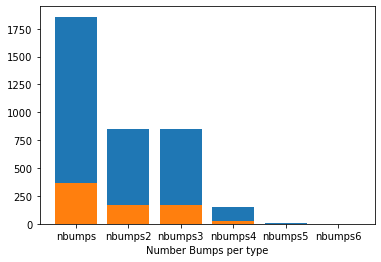

In [30]:
X=df.values
n = np.zeros(shape=6)
m = np.zeros(shape=6)

for a in range(0,5):
    for b in range(0,2582):   
        if X[b,18]==1:         
            m[a]=m[a]+X[b,8+a] 
for a in range(0,5):
    for b in range(0,2582):   
        if X[b,18]==0:         
            n[a]=n[a]+X[b,8+a]                 

plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[n[0],n[1],n[2],n[3],n[4],n[5]])
plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[m[0],m[1],m[2],m[3],m[4],m[5]])
plt.xlabel("Number Bumps per type")

Text(0.5, 0, 'Number Bumps per type')

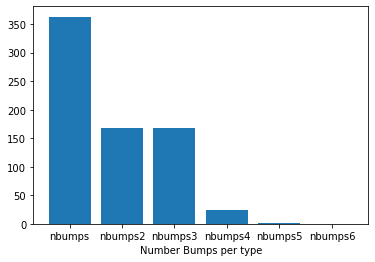

In [31]:
plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[m[0],m[1],m[2],m[3],m[4],m[5]])
plt.xlabel("Number Bumps per type")

In [32]:
Y=np.zeros(shape=5)
for a in range(0,4):
   Y[a]=  n[a]/m[a]
Y,n,m

(array([5.1184573 , 5.05357143, 5.04166667, 6.        , 0.        ]),
 array([1858.,  849.,  847.,  150.,   11.,    0.]),
 array([363., 168., 168.,  25.,   1.,   0.]))

In [33]:
#vedendo che approssimando la proporzione, quest'ultima è intorno a 5, possiamo dire non c'è correlazione tra il numero dei bumps e la classe di pericolosità. 
#Esiste però un'eccezione al bumps di tipo 5, in cui non ci sono abbastanza dati per la classe num1
#Quindi non possiamo attribuire ai bumps num 5 una correlazione con la classe

In [34]:
df.corr()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
genergy,1.000000,0.748020,0.048514,0.071554,0.220720,0.143587,0.191753,0.150589,-0.009863,NaN,NaN,NaN,0.080828,0.064405,0.128160
gpuls,0.748020,1.000000,0.293036,0.382906,0.300923,0.207390,0.225695,0.256547,0.049450,NaN,NaN,NaN,0.187350,0.164263,0.201042
gdenergy,0.048514,0.293036,1.000000,0.811944,0.030039,0.041246,-0.012189,0.036916,0.123229,NaN,NaN,NaN,0.105971,0.108572,0.002957
gdpuls,0.071554,0.382906,0.811944,1.000000,0.057996,0.051106,0.014735,0.066195,0.141044,NaN,NaN,NaN,0.143277,0.143646,0.021788
nbumps,0.220720,0.300923,0.030039,0.057996,1.000000,0.804978,0.803364,0.395052,0.069613,NaN,NaN,NaN,0.347852,0.273714,0.248144
nbumps2,0.143587,0.207390,0.041246,0.051106,0.804978,1.000000,0.350724,0.161296,-0.005251,NaN,NaN,NaN,0.124650,0.085032,0.201381
nbumps3,0.191753,0.225695,-0.012189,0.014735,0.803364,0.350724,1.000000,0.175301,0.046498,NaN,NaN,NaN,0.244083,0.176480,0.205327
nbumps4,0.150589,0.256547,0.036916,0.066195,0.395052,0.161296,0.175301,1.000000,-0.016580,NaN,NaN,NaN,0.489828,0.416483,0.075458
nbumps5,-0.009863,0.049450,0.123229,0.141044,0.069613,-0.005251,0.046498,-0.016580,1.000000,NaN,NaN,NaN,0.773605,0.808406,0.004834
nbumps6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
W=df.values
W[df['seismic']=='a']

array([['a', 'a', 'N', ..., 0, 0, 0],
       ['a', 'a', 'N', ..., 2000, 2000, 0],
       ['a', 'a', 'N', ..., 0, 0, 0],
       ...,
       ['a', 'a', 'W', ..., 0, 0, 0],
       ['a', 'a', 'W', ..., 0, 0, 0],
       ['a', 'a', 'W', ..., 0, 0, 0]], dtype=object)

In [36]:
#genergy e gpuls, shift class, maxenergy energy

Text(0.5, 0, 'Number Bumps per type')

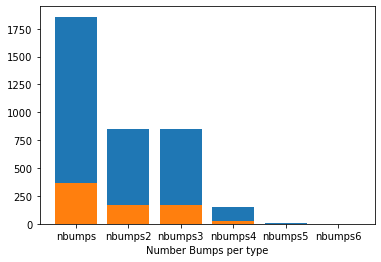

In [37]:
X=df.values
n = np.zeros(shape=6)
m = np.zeros(shape=6)

for a in range(0,5):
    for b in range(0,2582):   
        if X[b,18]==1:         
            m[a]=m[a]+X[b,8+a] 
for a in range(0,5):
    for b in range(0,2582):   
        if X[b,18]==0:         
            n[a]=n[a]+X[b,8+a]                 

plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[n[0],n[1],n[2],n[3],n[4],n[5]])
plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[m[0],m[1],m[2],m[3],m[4],m[5]])
plt.xlabel("Number Bumps per type")